In [3]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression Do-It-Yourself

In [4]:
import numpy as np

X = 5 * np.random.rand(100, 1) 
y = 1 + 4 * X + 3*np.random.randn(100, 1)

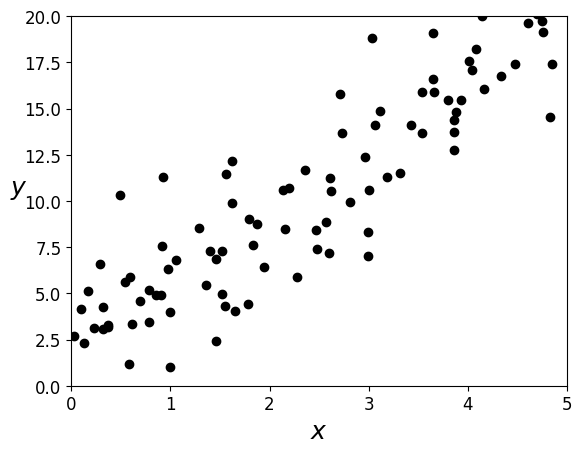

In [5]:
plt.scatter(X, y, color = 'black' )
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

In [7]:
x_new = np.linspace(0,5,100)
theta_1 = 3.25
theta_0 = 2.5
y_hyp = theta_1 * x_new + theta_0

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

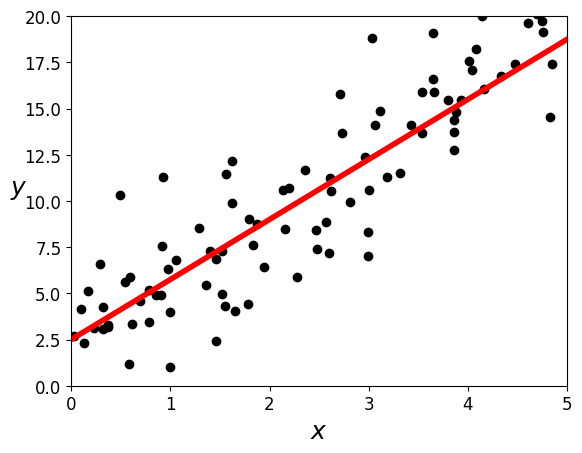

In [10]:
plt.scatter(X, y, color = 'black' )
plt.plot(x_new, y_hyp, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

# Linear regression using batch gradient descent

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
N = 100


theta_1 = np.random.randn(1)
theta_0 = np.random.randn(1) # random initialization

cum_theta1=[]
cum_theta0=[]

In [12]:
print("theta_1: ", theta_1)
print("theta_0: ", theta_0)

theta_1:  [0.01300189]
theta_0:  [1.45353408]


In [13]:
for iteration in range(n_iterations):
    cum_theta1.append(theta_1)
    cum_theta0.append(theta_0)
    
    gradient_theta_1 = 1/N * np.sum((theta_1*X + theta_0 - y)*X)
    gradient_theta_0 = 1/N * np.sum((theta_1*X + theta_0 - y))
    
    theta_1 = theta_1 - eta * gradient_theta_1
    theta_0 = theta_0 - eta * gradient_theta_0
    
    

In [14]:
print("theta_1: ", theta_1)
print("theta_0: ", theta_0)

theta_1:  [3.72413606]
theta_0:  [1.64528847]


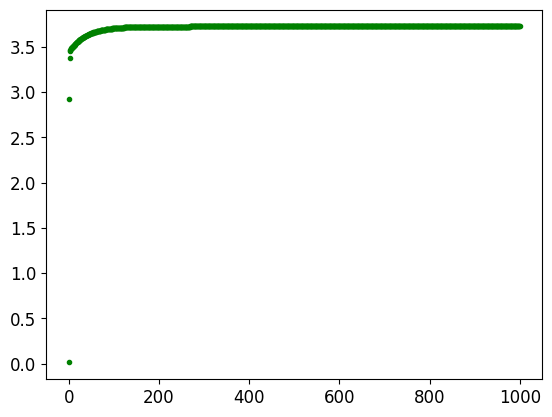

In [15]:
plt.plot(cum_theta1, 'g.')

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("theta_1: ", lin_reg.coef_)
print("theta_0: ", lin_reg.intercept_) 

theta_1:  [[3.72413606]]
theta_0:  [1.64528847]


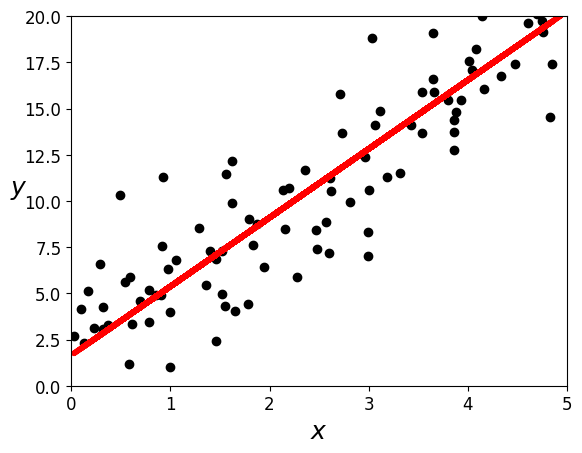

In [17]:
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_

plt.scatter(X, y, color = 'black' )
plt.plot(X, ypred_exact, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()